<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

## **Tugas *2*: *Clustering***

### **Tenggat Waktu: 12 Oktober 2021, 23.55 WIB**
</center>

#### **Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama.ipynb**. Contoh: F_Tugas2_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **12 Oktober 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [937]:
# Isi dengan data diri Anda
NAMA = "Fahdii Ajmalal Fikrie"
KELAS = "D"
NPM = "1906398370"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = [
    'Abdurrahman Arfan - 1906353901'
]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    'https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html',
    'https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html',
    'https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html'
]

In [938]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Fahdii Ajmalal Fikrie dari kelas D dengan NPM 1906398370, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Fahdii Ajmalal Fikrie)


## Soal Tugas 2
**Catatan**: Algoritma clustering yang boleh dipakai pada tugas ini hanya K-means dan Agglomerative.

In [939]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from IPython.display import display
from pprint import pprint

### **Soal 1 [15 Poin] - Teori**



#### a. Jelaskan mengapa K-means clustering tidak cocok untuk yang bukan hyper-spheres?

Karena algoritma k-means belum bisa mengakomodir apabila bentuk persebaran data tidak berbentuk hyper-spheres. Seperti misalnya bentuk persebaran data pada ilustrasi soal3, apabila menggunakan k-means, maka akan tidak akan terbagi dua klaster sebagaimana yang seharusnya terjadi. Alih-alih, klaster malah akan terbagi berdasarkan *mean distance* kepada centroid sebagaimana algoritma k-means.

#### b. Jelaskan mengapa algoritma Hierarchical clustering dapat digunakan tanpa perlu menetapkan jumlah cluster?

Karena pada beberapa algoritma Hierarchical, tidak diperlukan untuk terlebih dahulu menentukan initial centroid sebagaimana pada algoritma K-Means.

#### c. Jelaskan apa itu nilai metrik intra-class similarity dan cara menghitungnya!

Intra-class similarity/intra-cluster similarity adalah metrik untuk menilai kemiripan antara elemen-elemen yang ada di dalam suatu kelas. Semakin besar nilai intra-class (data pada klaster semakin mirip), maka clustering yang dihasilkan semakin baik pula.

Cara menghitungnya adalah:

<center><img src="https://i.imgur.com/jziRkFt.png" alt="intra-class-formula"></center>

Dengan |C(o)| adalah jumlah data dalam suatu klaster, dan d(o, p) adalah jarak masing-masing data ke dalam centroid suatu klaster.

#### d. Jelaskan apa itu nilai metrik inter-class similarity dan cara menghitungnya!

inter-class similarity/inter-cluster similarity adalah metrik untuk menilai kemiripan antara klaster-klaster yang ada dalam suatu persebaran data. Semakin kecil nilai inter-class (data antar klaster semakin tidak mirip), maka clustering yang dihasilkan semakin baik pula.

Cara menghitungnya adalah:

<center><img src="https://i.imgur.com/E9NWAtu.png" alt="intra-class-formula"></center>

Dengan |C(o)| adalah jumlah data dalam suatu klaster, dan d(o, p) adalah jarak masing-masing data ke dalam centroid suatu klaster. Yang dicari adalah minimum dari intra-cluster pada klaster-klaster yang ada.

### **Soal 2 [40 Poin] - Guess the clustering**





#### a. Buka data dari soal2.csv dan plot semua titik di plot dua dimensi!

In [940]:
# Mengimpor dataset soal2
soal2_df = pd.read_csv("soal2.csv")

display(soal2_df)

,x1,x2
0,9.063209,-2.528833
1,-3.896203,1.464862
2,-1.979298,-7.873692
3,-5.437357,2.759334
4,2.052434,-9.600788
...,...,...
5245,-2.464020,-1.675777
5246,-2.537909,-1.666213
5247,-2.571251,-1.658077
5248,-2.564734,-1.651399


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='x1', ylabel='x2'>

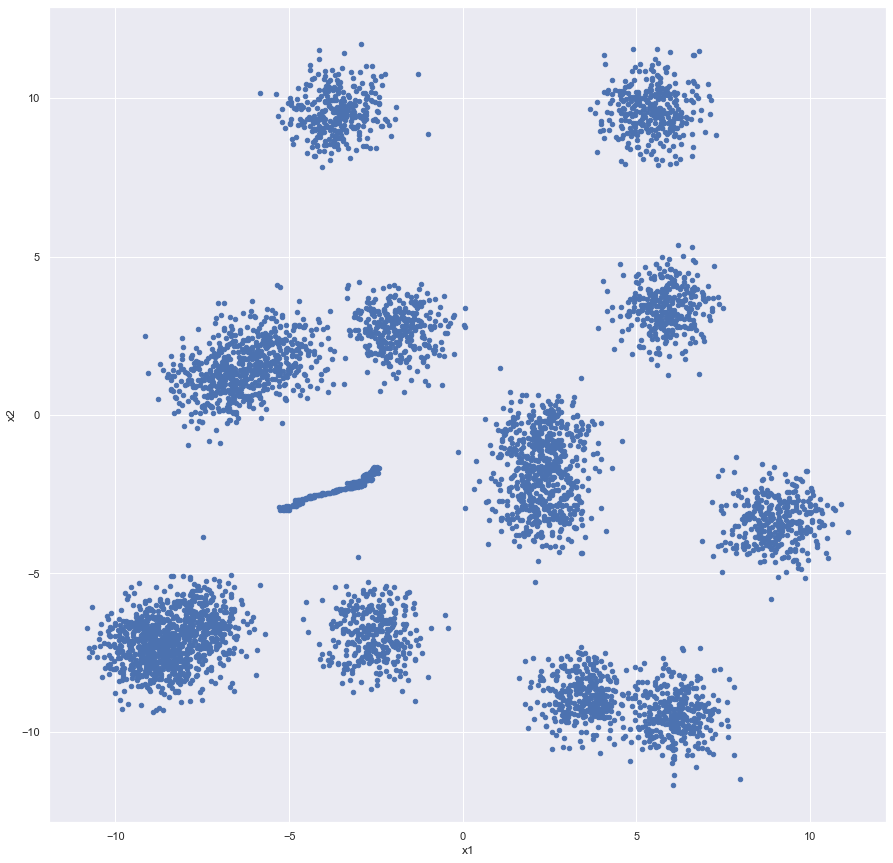

In [941]:
# Menampilkan scatterplot
soal2_df.plot.scatter(x="x1", y="x2", figsize=(15, 15))

#### b. Dari plot tersebut, usulkan jumlah klaster yang dapat membagi data dengan baik!



Berdasarkan *scatterplot*, terlihat bahwa terdapat tepat 11 klaster yang terbentuk. Maka algoritma klaster yang selanjutnya akan diimplementasikan akan melakukan *clustering* data menjadi 11 klaster.

#### c. Gunakan sebuah algoritma clustering yang dapat membagi data sesuai dengan jumlah klaster yang Anda usulkan. Jelaskan mengapa algoritma clustering tersebut digunakan!
**Catatan**: Jawaban seperti karena “K-Means bisa/baik dipakai untuk clustering” tidak cukup. Semua algoritma clustering bisa dipakai untuk clustering. Tapi kenapa itu?

Algoritma yang dipilih adalah K-Means. Pemilihan algoritma K-Means adalah berdasarkan hasil *scatterplot* yang menunjukkan bahwa data tidak memiliki outlier dan masih masuk ke dalam bentuk *hyper-sphere*.

In [942]:
# Melakukan pemrosesan k-means clustering kepada dataset soal2
processor_km = KMeans(n_clusters=11)
soal2_df_clustered = processor_km.fit(soal2_df)

#### d. Visualisasikan hasil clustering dengan menampilkan scatter plot data yang di color-codedberdasarkan klasternya. Selain itu, cetak jumlah cluster yang dihasilkan!
**Hint**: Pelajari parameter c pada fungsi matplotlib.pyplot.scatter()



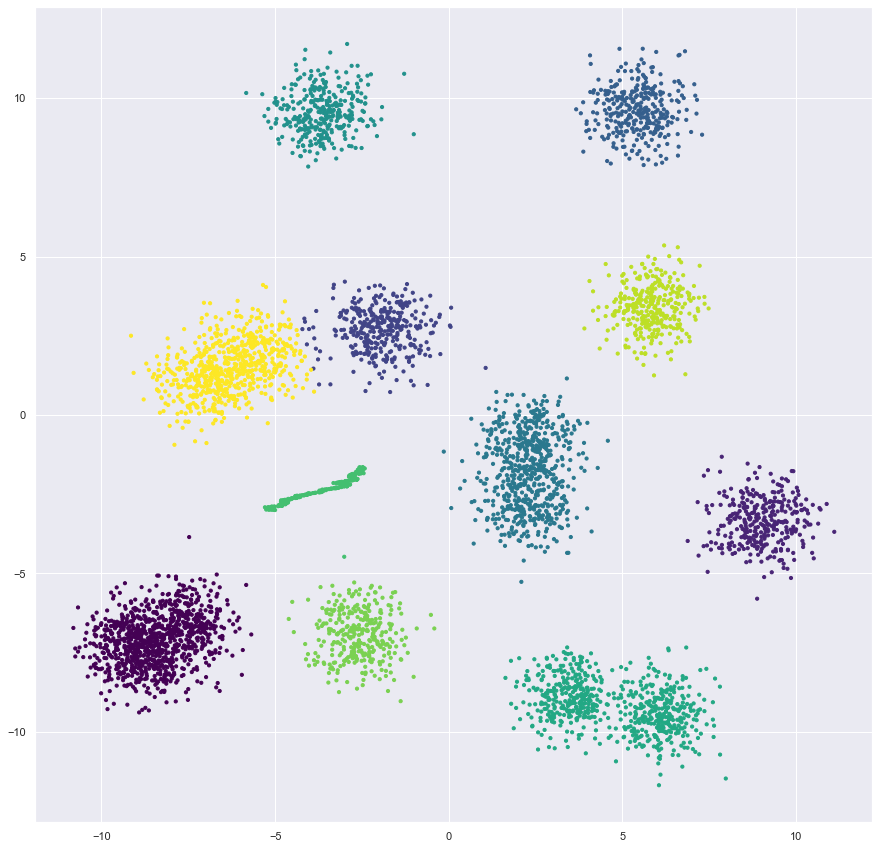

In [943]:
# Melakukan visualisasi hasil k-means clustering
c_map = processor_km.predict(soal2_df)
plt.figure(figsize=(15, 15))
plt.scatter(soal2_df['x1'], soal2_df['x2'], c=c_map, s=10, cmap='viridis')

#### e. Hitung nilai intra-class similarity hasil clustering tersebut dengan menghitung jumlah dari jarak (sum of distance) masing-masing sampel dengan pusat klasternya! Koordinat sebuah pusat klaster adalah rata-rata dari semua sampel di klaster tersebut. Rumus jarak yang digunakan adalah L2-norm/Euclidean Distance.



#### f. Hitung nilai silhouette coefficient dari hasil clustering tersebut!

In [944]:
# Menghitung silhouette coefficient
labels = processor_km.labels_
silhouette_coef = silhouette_score(soal2_df, labels, metric='euclidean')

print(f'Silhouette coefficient dari hasil clustering adalah {silhouette_coef}')

Silhouette coefficient dari hasil clustering adalah 0.7181806865976839


### **Soal 3 [30 Poin] - Hierarchical Clustering**



#### a. Buka data dari soal3.csv dan plot semua titik di plot dua dimensi

In [945]:
# Mengimpor dataset soal3
soal3_df = pd.read_csv("soal3.csv")

display(soal3_df)

,x,y
0,-25.0,-50.0
1,-24.5,-59.9
2,-24.0,-69.6
3,-23.5,-79.1
4,-23.0,-88.4
...,...,...
795,-2.5,-197.5
796,-2.0,-206.6
797,-1.5,-215.9
798,-1.0,-225.4


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='x', ylabel='y'>

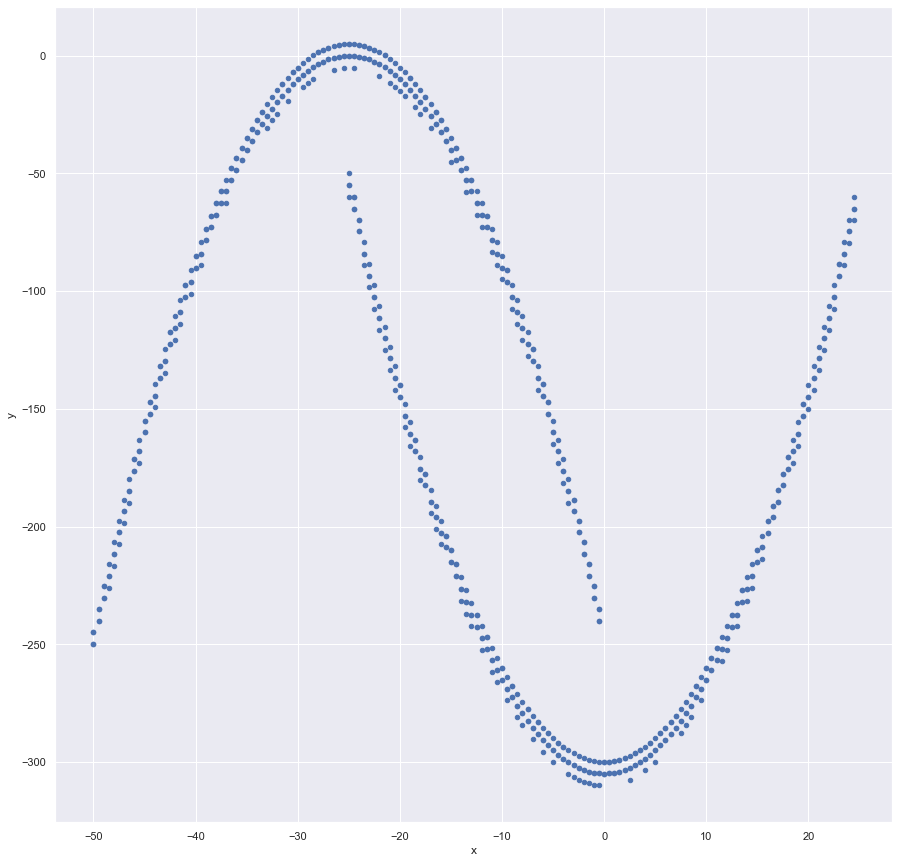

In [946]:
# Melakukan plotting dengan bentuk scatterplot
soal3_df.plot.scatter(x="x", y="y", figsize=(15, 15))

#### b. Pada soal ini, anda diharapkan melakukan clustering menggunakan algoritma Agglomerative sehingga terbuat klaster seperti berikut:

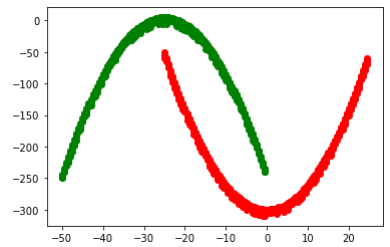

In [947]:
# Melakukan pemrosesan agglomerative clustering kepada dataset 2
processor_ac = AgglomerativeClustering(n_clusters=2)
soal3_df_clustered = processor_ac.fit(soal3_df)

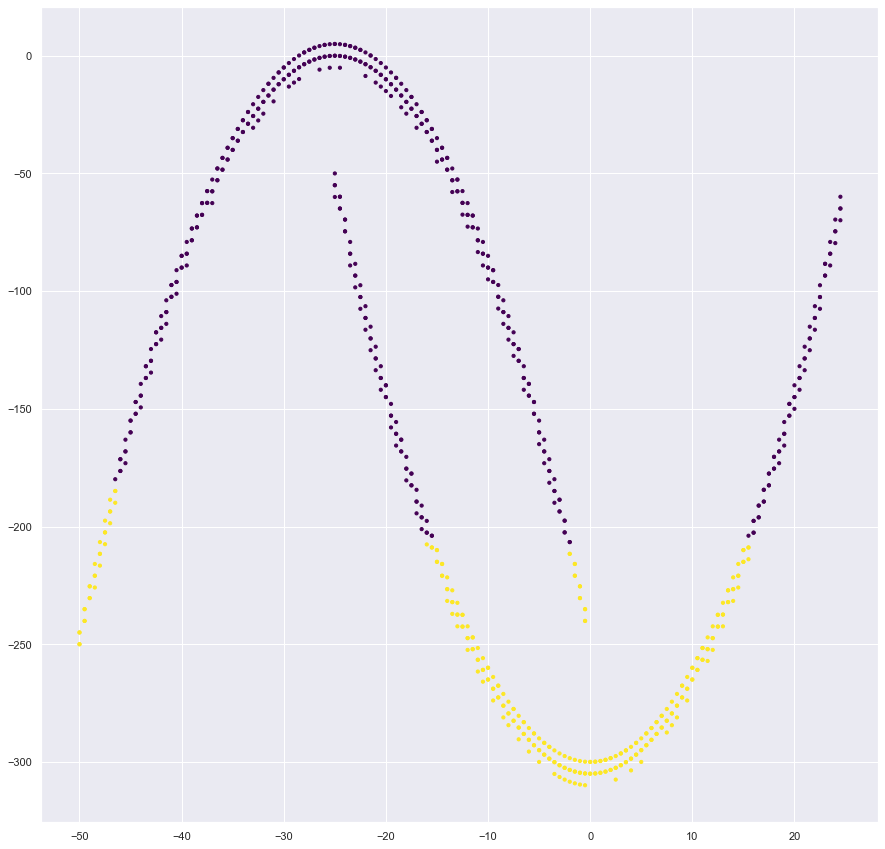

In [948]:
# Melakukan visualisasi hasil k-means clustering
c_map = processor_ac.labels_
plt.figure(figsize=(15, 15))
plt.scatter(soal3_df['x'],soal3_df['y'], c=c_map, s=10, cmap='viridis')

In [949]:
# Melakukan pemrosesan agglomerative clustering kepada dataset 2 menggunakan linkage
processor_ac_single = AgglomerativeClustering(n_clusters=2, linkage='single')
soal3_df_clustered = processor_ac_single.fit(soal3_df)

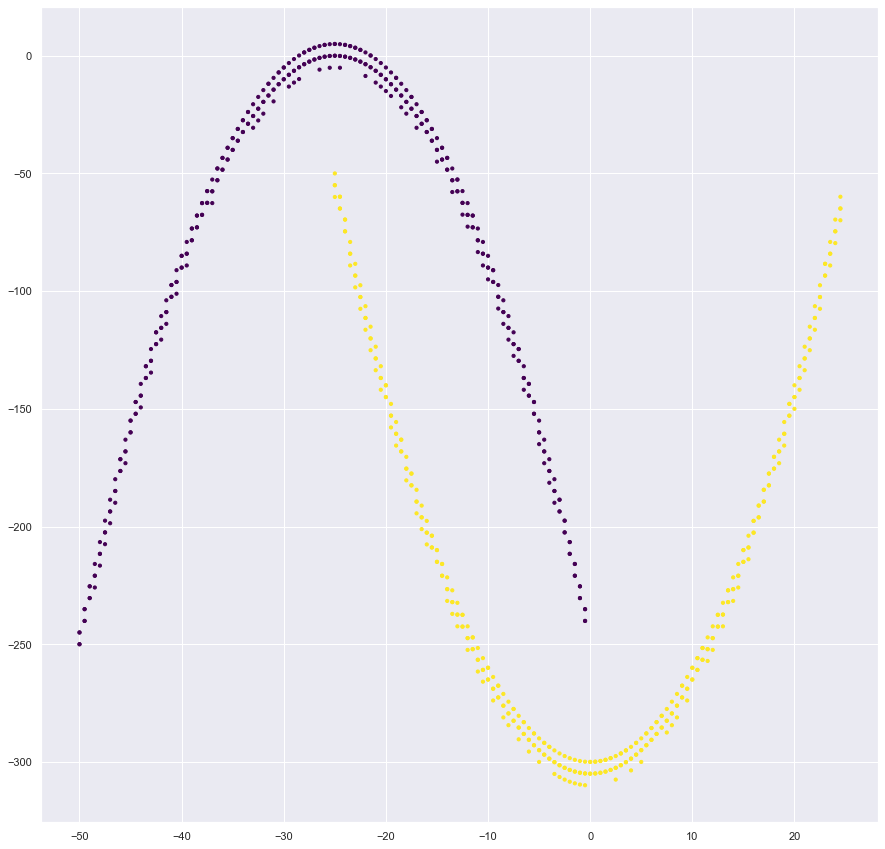

In [950]:
# Melakukan visualisasi hasil k-means clustering
c_map = processor_ac_single.labels_
plt.figure(figsize=(15, 15))
plt.scatter(soal3_df['x'],soal3_df['y'], c=c_map, s=10, cmap='viridis')

#### c. Kemungkinan besar saat Anda menggunakan modul algoritma Agglomerative dari library sklearn, Anda harus mengubah parameter yang digunakan. Sebutkan parameter apa saja yang anda gunakan beserta nilainya, dan jelaskan alasan anda menggunakan parameter tersebut dan menggunakan nilai tersebut.

Parameter yang digunakan pada pemanggilan class AgglomerativeClustering ada dua, yakni n_cluster dan linkage. Perlu menggunakan parameter linkage dipilih jenis link pada algoritma AC yang sesuai dengan dataset.

#### d. (Bonus) Lakukan clustering menggunakan K-Means pada data tersebut, visualisasikan hasilnya, kemudian lakukan analisis terhadap hasil tersebut.

In [951]:
# Melakukan pemrosesan k-means clustering kepada dataset soal2
processor_km = KMeans(n_clusters=2)
soal3_df_kmeans_clustered = processor_km.fit(soal3_df)

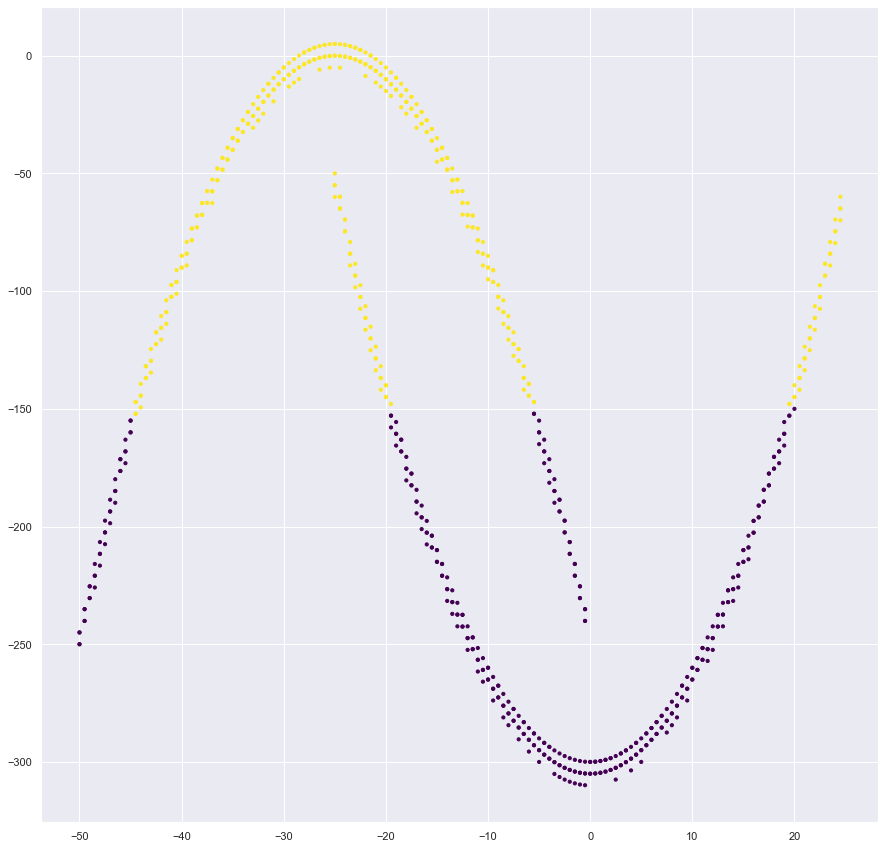

In [952]:
# Melakukan visualisasi hasil k-means clustering
c_map = processor_km.predict(soal3_df)
plt.figure(figsize=(15, 15))
plt.scatter(soal3_df['x'], soal3_df['y'], c=c_map, s=10, cmap='viridis')

Apabila menggunakan k-means, sebagaimana yang dijelaskan pada no. 1a, k-means tidak cocok digunakan untuk data yang persebarannya tidak berbentuk hyper-ellipsoid/hyper-spheres. Maka, klaster yang terbentuk pada visualisasi di atas tidak sesuai yang sebagaimana harusnya (yakni terpisah pada persebaran cekung atas dan persebaran cekung bawah).

### **Soal 4 [20 Poin] - Which came first: dimensionality reduction or clustering?**





#### a. Buka data dari soal4.csv dan tampilkan 10 baris pertama! Hitung jumlah data dan jumlah fitur!

In [953]:
# Mengimpor dataset soal4
soal4_df = pd.read_csv("soal4.csv")

# Menampilkan 10 baris pertama
display(soal4_df.head(10))

,A,B,E
0,0.470839,-0.978228,-4.981786
1,-0.079349,-0.798295,-5.173138
2,0.698990,-1.925331,-5.955414
3,1.246046,-0.125634,-6.029880
4,0.570842,-0.672183,-4.181259
5,0.325580,-1.389908,-2.461709
6,0.721706,-0.615033,-5.444958
7,0.793625,-0.781055,-5.084923
8,0.576666,0.001895,-6.165497
9,0.907629,-0.650638,-6.290293


In [954]:
# Menampilkan jumlah data dan jumlah fitur
print("(jumlah data, jumlah fitur)")
display(soal4_df.shape)

(jumlah data, jumlah fitur)


(1000, 3)

#### b. Ikuti langkah-langkah berikut:


##### i. Salin data asli dan masukkan dalam variable data_copy_1!

In [955]:
# Mengimpor data copy 1
data_copy_1 = soal4_df.copy(deep=True)

##### ii. Lakukan Dimensionality reduction (PCA) pada data_copy_1 sehingga jumlah fiturnya menjadi 2!

In [956]:
# Membagi data menjadi data_copy_1 (X) dan data_copy_1_label (y)
del data_copy_1['E']
data_copy_1_label = soal4_df[['E']]

display(data_copy_1)
display(data_copy_1_label)

,A,B
0,0.470839,-0.978228
1,-0.079349,-0.798295
2,0.698990,-1.925331
3,1.246046,-0.125634
4,0.570842,-0.672183
...,...,...
995,16.400102,-17.715935
996,12.370285,-10.857505
997,8.345081,-7.208853
998,7.236604,-8.093276


,E
0,-4.981786
1,-5.173138
2,-5.955414
3,-6.029880
4,-4.181259
...,...
995,6.226541
996,5.692436
997,8.322084
998,7.794231


In [957]:
# Melakukan standardidasi
scaler = StandardScaler()
data_copy_1_std = scaler.fit_transform(data_copy_1)

In [958]:
# Melakukan reduksi dimensi
processor_pca = PCA(n_components=1)

data_copy_1_reduced = processor_pca.fit_transform(data_copy_1_std)
data_copy_1_reduced.shape

(1000, 1)

##### iii. Visualisasikan data_copy_1 yang sudah direduksi, kemudian tentukan berapa jumlah cluster yang tepat!



(1000,)
(1, 1000)
(1000, 2)


<AxesSubplot:xlabel='A', ylabel='label'>

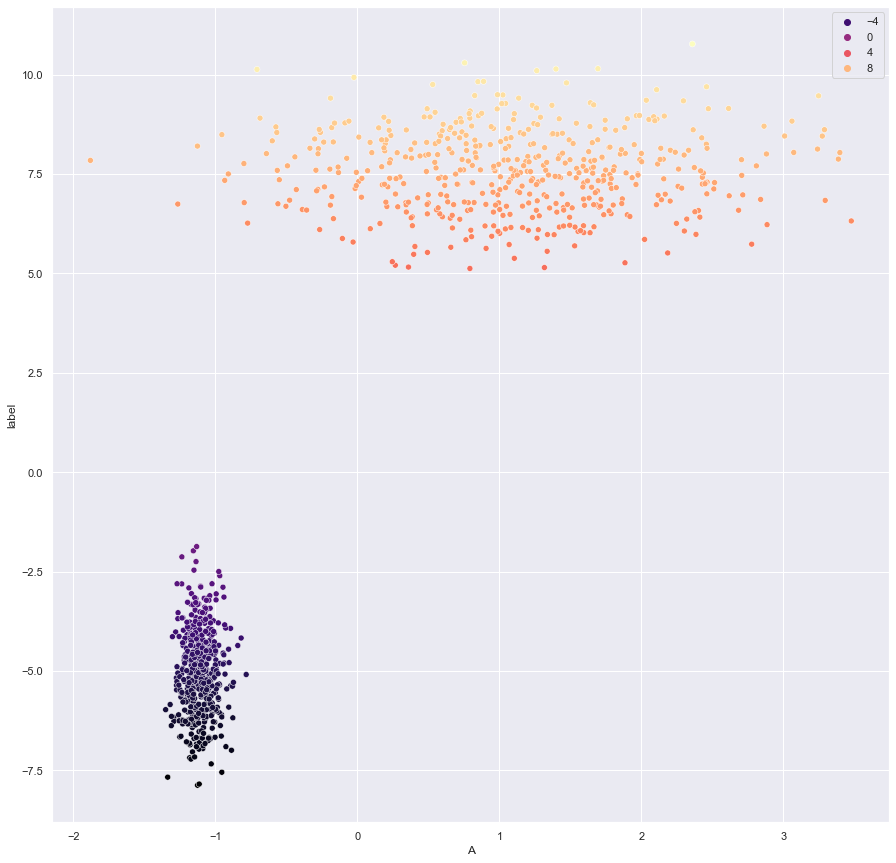

In [959]:
y = soal4_df.iloc[:,2].values
skl_pca = np.vstack((data_copy_1_reduced.T, y)).T
principal_df = pd.DataFrame(data=skl_pca, columns=['A', 'label'])

print(y.shape)
print(data_copy_1_reduced.T.shape)
print(principal_df.shape)

sns.set(rc={'figure.figsize':(15, 15)})
sns.scatterplot(
    x="A",
    y="label",
    hue=principal_df.label.tolist(),
    palette=sns.color_palette("magma", as_cmap=True),
    data=principal_df,
)

##### iv. Lakukan clustering pada data_copy_1 yang sudah direduksi menggunakan K-Means dengan parameter random_state=2021!



In [960]:
# Melakukan pemrosesan k-means clustering kepada dataset soal4
# yang sudah dilakukan dimensi reduksi
processor_km = KMeans(n_clusters=2, random_state=2021)
data_copy_1_reduced_clustered = processor_km.fit(principal_df)

##### v. Visualisasikan hasil clustering pada data_copy_1 yang sudah direduksi!



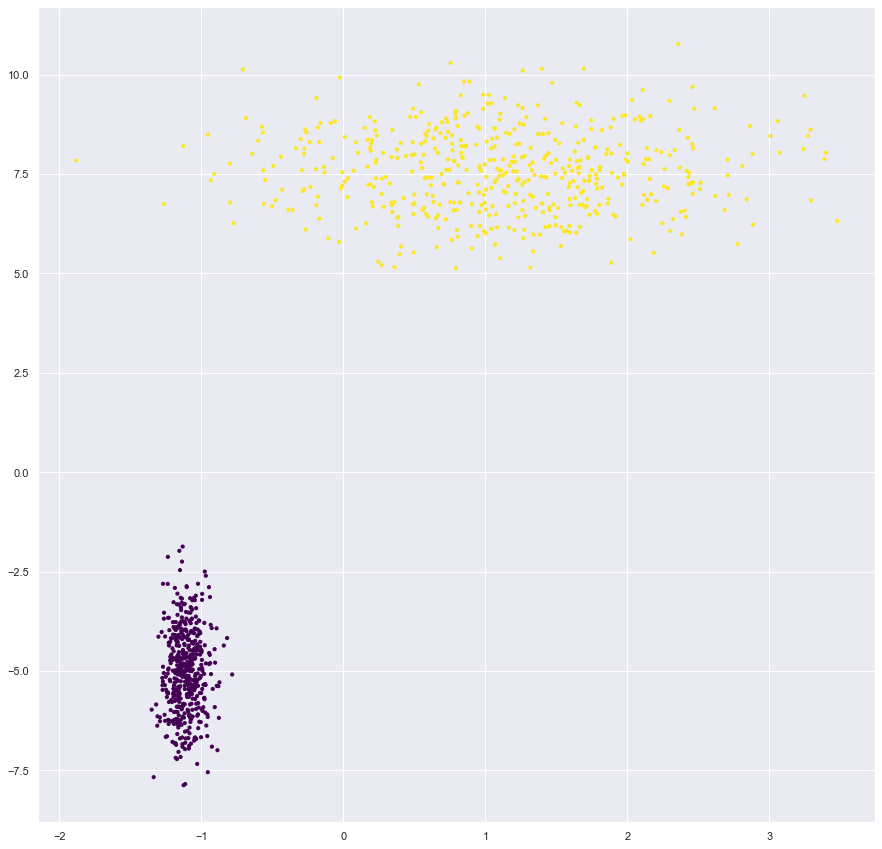

In [961]:
# Melakukan visualisasi hasil k-means clustering
c_map = processor_km.predict(principal_df)
plt.figure(figsize=(15, 15))
plt.scatter(principal_df['A'], data_copy_1_label, c=c_map, s=10, cmap='viridis')

#### c. Ikuti langkah-langkah berikut:



##### i. Salin data asli dan masukkan dalam variable data_copy_2!


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='A', ylabel='B'>

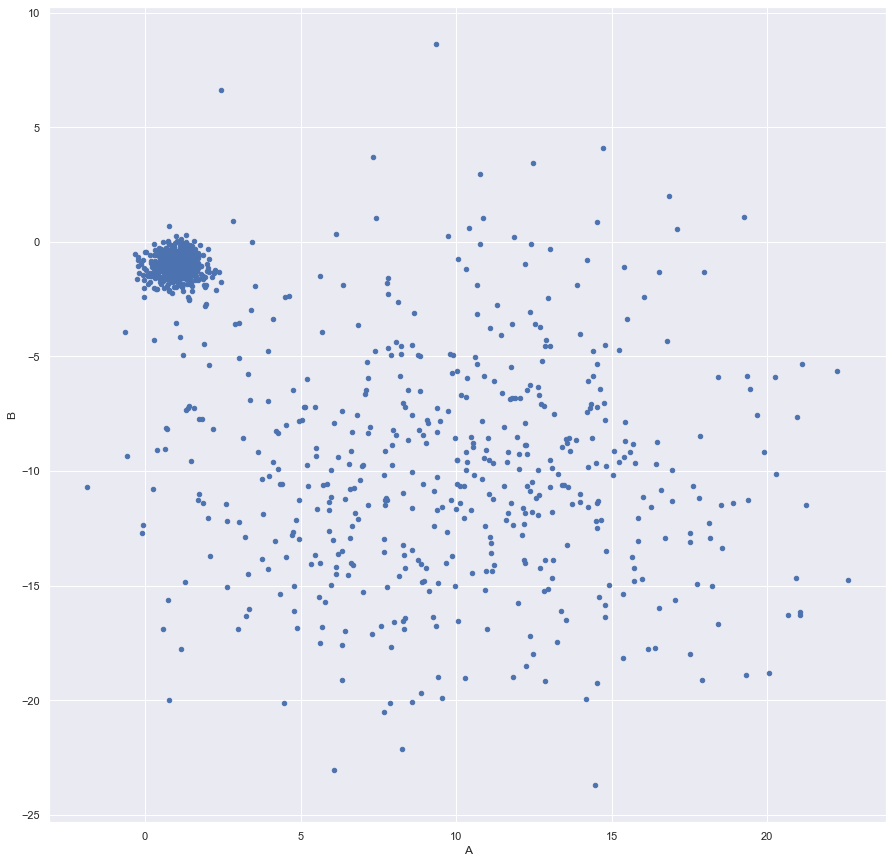

In [962]:
# Mengimpor data copy 2
data_copy_2 = soal4_df.copy(deep=True)

# Melakukan plotting secara scatterplot pada data_copy_2
data_copy_2.plot.scatter(x="A", y="B", figsize=(15, 15))

##### ii. Lakukan clustering pada data_copy_2 menggunakan K-Means dengan parameter random_state=2021 dan jumlah cluster sama dengan jumlah cluster yang kamu gunakan pada poin b!


In [963]:
# Melakukan pemrosesan k-means clustering kepada dataset soal4
processor_km = KMeans(n_clusters=2, random_state=2021)
data_copy_2_clustered = processor_km.fit(data_copy_2)

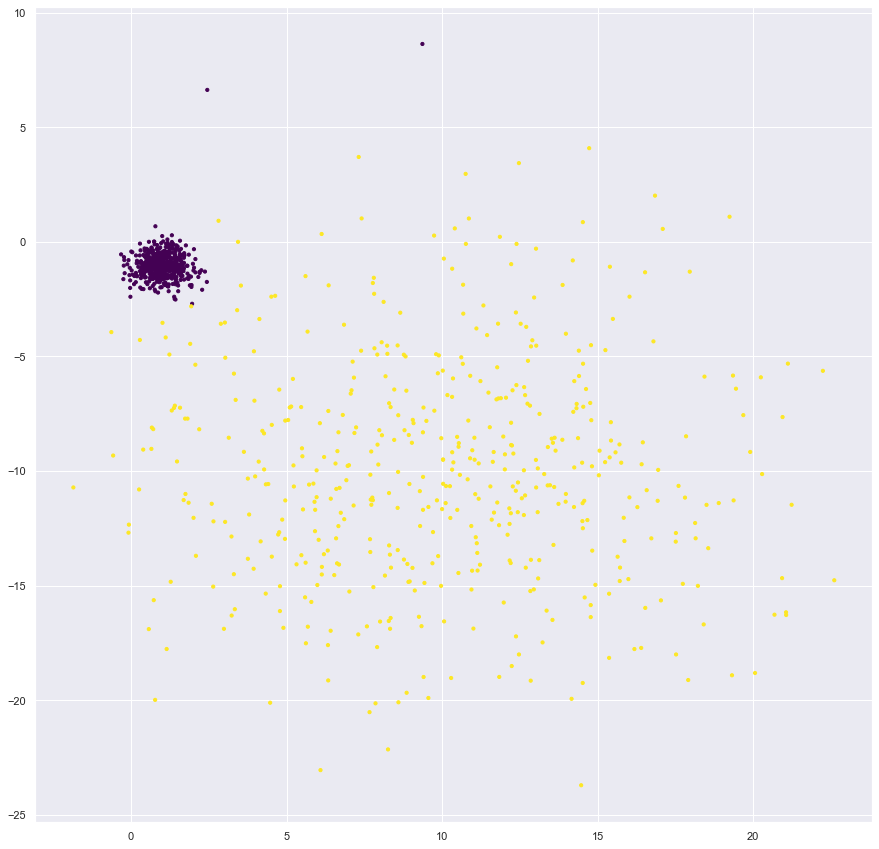

In [964]:
# Melakukan visualisasi hasil k-means clustering
c_map = processor_km.predict(data_copy_2)
plt.figure(figsize=(15, 15))
plt.scatter(data_copy_2['A'], data_copy_2['B'], c=c_map, s=10, cmap='viridis')

##### iii. Lakukan Dimensionality reduction (PCA) pada data_copy_2 sehingga jumlah fiturnya menjadi 2!


In [965]:
del data_copy_2['E']
data_copy_2_label = soal4_df[['E']]

display(data_copy_2)
display(data_copy_2_label)

,A,B
0,0.470839,-0.978228
1,-0.079349,-0.798295
2,0.698990,-1.925331
3,1.246046,-0.125634
4,0.570842,-0.672183
...,...,...
995,16.400102,-17.715935
996,12.370285,-10.857505
997,8.345081,-7.208853
998,7.236604,-8.093276


,E
0,-4.981786
1,-5.173138
2,-5.955414
3,-6.029880
4,-4.181259
...,...
995,6.226541
996,5.692436
997,8.322084
998,7.794231


In [966]:
# Melakukan standardidasi
scaler = StandardScaler()
data_copy_2_clustered_std = scaler.fit_transform(data_copy_2)

In [967]:
# Melakukan reduksi dimensi
processor_pca = PCA(n_components=1)

data_copy_2_clustered_reduced = processor_pca.fit_transform(data_copy_2_clustered_std)
data_copy_2_clustered_reduced.shape

(1000, 1)

##### iv. Visualisasikan hasil clustering pada data_copy_2 yang sudah direduksi!


(1000,)
(1, 1000)
(1000, 2)


<AxesSubplot:xlabel='A', ylabel='label'>

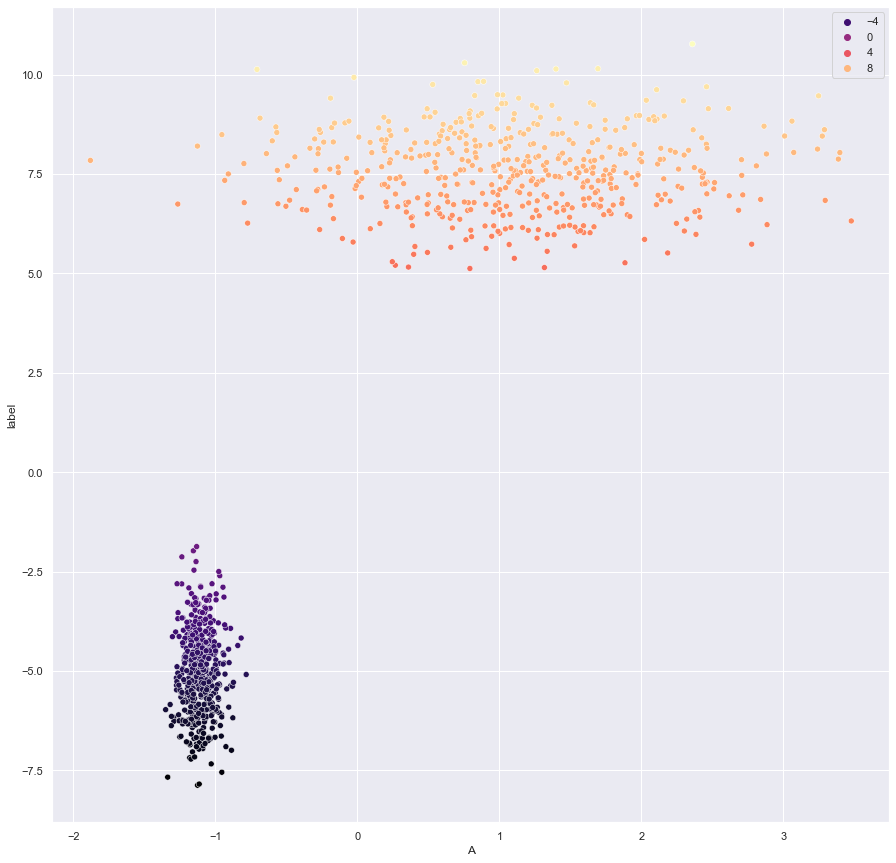

In [968]:
y = soal4_df.iloc[:,2].values
skl_pca = np.vstack((data_copy_2_clustered_reduced.T, y)).T
principal_df = pd.DataFrame(data=skl_pca, columns=['A', 'label'])

print(y.shape)
print(data_copy_2_clustered_reduced.T.shape)
print(principal_df.shape)

sns.set(rc={'figure.figsize':(15, 15)})
sns.scatterplot(
    x="A",
    y="label",
    hue=principal_df.label.tolist(),
    palette=sns.color_palette("magma", as_cmap=True),
    data=principal_df,
)

#### d. Apakah ada perbedaan pada hasil poin b dan poin c? Mengapa demikian? Apa kesimpulan yang bisa anda ambil?

Didapatkan bahwa hasil yang dilakukan sama terlepas mana yang lebih dulu dilakukan antara dimensionality reduction dan clustering.